In [230]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import io
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [231]:
#!gdown --id 1iflIk1AxLMjOL_VW19rr2VHcmmMc7D9Q

In [232]:
from numpy.random import seed
seed(100)

# Loading the data

In [233]:
main_df = pd.read_csv("Features_and_Target.csv")

In [234]:
main_df

,permno,yyyymm,ticker,r1m,close_price,AnnouncementReturn,betaVIX,BookLeverage,ConvDebt,DolVol,...,Consumer_sentiment,Date_encode,Investor_sentiment_3MA,Investor_sentiment_6MA,News_sentiment_3MA,News_sentiment_6MA,Consumer_sentiment_3MA,Consumer_sentiment_6MA,forward_return,target
0,24643,199208,AA,-11.830509,64.625,-0.034219,-0.002155,-1.991768,-1.0,-6.319875,...,0.3805,1,NaN,NaN,NaN,NaN,NaN,NaN,2.514507,1
1,24643,199209,AA,2.514507,66.250,-0.034219,-0.001269,-1.991768,-1.0,-6.289308,...,0.3780,2,NaN,NaN,NaN,NaN,NaN,NaN,5.283019,1
2,24643,199210,AA,5.283019,69.750,0.002048,-0.001911,-1.991768,-1.0,-6.103797,...,0.3665,3,0.422500,NaN,0.487161,NaN,0.375000,NaN,1.111111,1
3,24643,199211,AA,1.111111,70.125,0.002048,0.000085,-1.991768,-1.0,-5.755551,...,0.4265,4,0.481250,NaN,0.488176,NaN,0.390333,NaN,2.139037,1
4,24643,199212,AA,2.139037,71.625,0.002048,-0.006525,-1.991768,-1.0,-6.073234,...,0.4550,5,0.569167,NaN,0.530369,NaN,0.416000,NaN,3.839441,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28594,89070,201412,ZMH,1.202242,113.420,0.030118,0.000256,-1.521382,0.0,-8.063711,...,0.4680,269,0.616750,0.590042,0.566568,0.545846,0.448833,0.431833,-1.163816,0
28595,89070,201501,ZMH,-1.163816,112.100,-0.013885,0.005394,-1.521382,0.0,-7.463536,...,0.4905,270,0.622750,0.601208,0.590869,0.561545,0.467500,0.445417,7.395184,1
28596,89070,201502,ZMH,7.395184,120.390,-0.013885,-0.002619,-1.521382,0.0,-7.653775,...,0.4770,271,0.598583,0.604125,0.594520,0.571278,0.478500,0.456167,-2.201182,0
28597,89070,201503,ZMH,-2.201182,117.520,-0.013885,0.004160,-1.521382,0.0,-8.047728,...,0.4650,272,0.576917,0.596833,0.581778,0.574173,0.477500,0.463167,-6.535058,0


In [235]:
len(main_df["ticker"].unique())

137

# Preprocessing the data

In [236]:
main_df.dropna(subset=['Investor_sentiment_3MA', 'News_sentiment_3MA',
          "Consumer_sentiment_3MA", "forward_return", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
          "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", "ReturnSkew", "Size",
          "STreversal", "zerotradeAlt1"], inplace=True)

In [237]:
main_df

,permno,yyyymm,ticker,r1m,close_price,AnnouncementReturn,betaVIX,BookLeverage,ConvDebt,DolVol,...,Consumer_sentiment,Date_encode,Investor_sentiment_3MA,Investor_sentiment_6MA,News_sentiment_3MA,News_sentiment_6MA,Consumer_sentiment_3MA,Consumer_sentiment_6MA,forward_return,target
2,24643,199210,AA,5.283019,69.750,0.002048,-0.001911,-1.991768,-1.0,-6.103797,...,0.3665,3,0.422500,NaN,0.487161,NaN,0.375000,NaN,1.111111,1
3,24643,199211,AA,1.111111,70.125,0.002048,0.000085,-1.991768,-1.0,-5.755551,...,0.4265,4,0.481250,NaN,0.488176,NaN,0.390333,NaN,2.139037,1
4,24643,199212,AA,2.139037,71.625,0.002048,-0.006525,-1.991768,-1.0,-6.073234,...,0.4550,5,0.569167,NaN,0.530369,NaN,0.416000,NaN,3.839441,1
5,24643,199301,AA,3.839441,74.375,-0.034033,0.003535,-1.991768,-1.0,-6.045333,...,0.4465,6,0.635167,0.528833,0.577251,0.532206,0.442667,0.408833,-5.176470,0
6,24643,199302,AA,-5.176470,70.125,-0.034033,-0.006632,-1.991768,-1.0,-6.001115,...,0.4330,7,0.621000,0.551125,0.606878,0.547527,0.444833,0.417583,-8.021390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28594,89070,201412,ZMH,1.202242,113.420,0.030118,0.000256,-1.521382,0.0,-8.063711,...,0.4680,269,0.616750,0.590042,0.566568,0.545846,0.448833,0.431833,-1.163816,0
28595,89070,201501,ZMH,-1.163816,112.100,-0.013885,0.005394,-1.521382,0.0,-7.463536,...,0.4905,270,0.622750,0.601208,0.590869,0.561545,0.467500,0.445417,7.395184,1
28596,89070,201502,ZMH,7.395184,120.390,-0.013885,-0.002619,-1.521382,0.0,-7.653775,...,0.4770,271,0.598583,0.604125,0.594520,0.571278,0.478500,0.456167,-2.201182,0
28597,89070,201503,ZMH,-2.201182,117.520,-0.013885,0.004160,-1.521382,0.0,-8.047728,...,0.4650,272,0.576917,0.596833,0.581778,0.574173,0.477500,0.463167,-6.535058,0


In [238]:
main_df['forward_return_div100'] = main_df['forward_return']/100

In [239]:
start_year = 1992  # Start year of your dataset
training_years = 8
validation_years = 2
testing_years = 5

train_end_year = start_year + training_years - 1
valid_end_year = train_end_year + validation_years
test_end_year = valid_end_year + testing_years

# Initialize lists to store the splits
training_splits = []
validation_splits = []
testing_splits = []


In [240]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [241]:
main_df['year'] = main_df['yyyymm'].astype(str).str[:4]

In [242]:
main_df['year']

2        1992
3        1992
4        1992
5        1993
6        1993
         ... 
28594    2014
28595    2015
28596    2015
28597    2015
28598    2015
Name: year, Length: 26890, dtype: object

In [243]:
main_df['year'] = main_df['year'].astype(int)

In [244]:
main_df['Date'] = pd.to_datetime(main_df['yyyymm'], format='%Y%m', errors='coerce').dropna()

In [245]:
main_df['yyyymm'] = main_df['yyyymm'].astype('int')

In [248]:
# Split the data into features and target
data_use = main_df[['year', "yyyymm", 'Investor_sentiment_3MA', 'News_sentiment_3MA',
          "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
          "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", "ReturnSkew", "Size",
          "STreversal", "zerotradeAlt1", 'forward_return_div100']]

# Scale the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_use_scaled = scaler.fit_transform(data_use)

# Convert the data into 3D tensors for the CNN model
# X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

In [249]:
while test_end_year <= 2022:  # Assuming your dataset goes up to 2020
    # Select the data for the current split
    train_data = data_use[(main_df['year'] >= start_year) & (data_use['year'] <= train_end_year)]
    valid_data = data_use[(main_df['year'] > train_end_year) & (data_use['year'] <= valid_end_year)]
    test_data = data_use[(main_df['year'] > valid_end_year) & (data_use['year'] <= test_end_year)]


    # Append the data to the respective lists
    training_splits.append(train_data)
    validation_splits.append(valid_data)
    testing_splits.append(test_data)

    # Update the start and end years for the next split
    start_year += 5
    train_end_year += 5
    valid_end_year += 5
    test_end_year += 5

In [250]:
# Define a function for creating and training a neural network model
def create_and_train_nn(X_train, y_train, X_valid, y_valid, X_test, y_test):
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)

    # Create a simple feedforward neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=40, batch_size=64)

    # Evaluate the model on the test data
    # y_pred = model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    return model, history


In [251]:
trained_models = []
trained_history = []
for train_data, valid_data, test_data in zip(training_splits, validation_splits, testing_splits):
    X_train = train_data[['Investor_sentiment_3MA', 'News_sentiment_3MA',
          "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
          "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", "ReturnSkew", "Size",
          "STreversal", "zerotradeAlt1"]]
    y_train = train_data[["forward_return_div100"]]
    X_valid = valid_data[['Investor_sentiment_3MA', 'News_sentiment_3MA',
          "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
          "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", "ReturnSkew", "Size",
          "STreversal", "zerotradeAlt1"]]
    y_valid = valid_data[["forward_return_div100"]]
    X_test = test_data[['Investor_sentiment_3MA', 'News_sentiment_3MA',
          "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
          "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", "ReturnSkew", "Size",
          "STreversal", "zerotradeAlt1"]]
    y_test = test_data[["forward_return_div100"]]

    model, history = create_and_train_nn(X_train, y_train, X_valid, y_valid, X_test, y_test)

    trained_models.append(model)

    trained_history.append(history)

    # print(f"Mean Squared Error for this split: {mse}")

Epoch 1/40
102/102 [==============================] - 0s 2ms/step - loss: 0.0501 - val_loss: 0.0412
Epoch 2/40
102/102 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0335
Epoch 3/40
102/102 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.0293
Epoch 4/40
102/102 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.0274
Epoch 5/40
102/102 [==============================] - 0s 965us/step - loss: 0.0112 - val_loss: 0.0266
Epoch 6/40
102/102 [==============================] - 0s 941us/step - loss: 0.0105 - val_loss: 0.0265
Epoch 7/40
102/102 [==============================] - 0s 910us/step - loss: 0.0101 - val_loss: 0.0259
Epoch 8/40
102/102 [==============================] - 0s 918us/step - loss: 0.0105 - val_loss: 0.0249
Epoch 9/40
102/102 [==============================] - 0s 935us/step - loss: 0.0095 - val_loss: 0.0245
Epoch 10/40
102/102 [==============================] - 0s 1ms/step - loss: 0.0093 - val_lo

In [252]:
trained_models[0].summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 64)                1344      
                                                                 
 dense_112 (Dense)           (None, 32)                2080      
                                                                 
 dense_113 (Dense)           (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


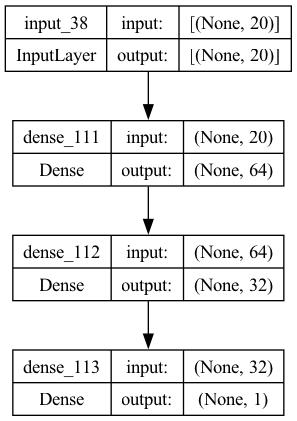

In [253]:
from tensorflow.keras.utils import plot_model

plot_model(trained_models[0], to_file='model.png', show_shapes=True)

In [254]:
trained_history[1].history.keys()

dict_keys(['loss', 'val_loss'])

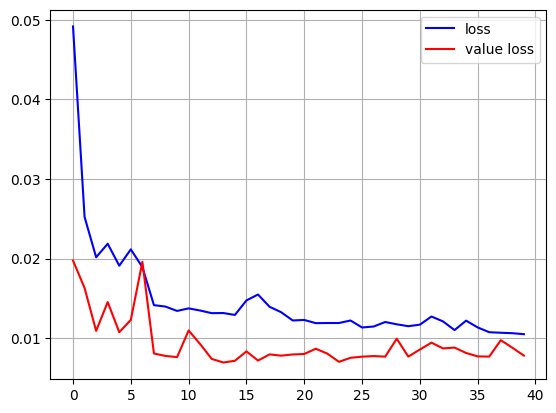

In [259]:
losses_data = pd.DataFrame(trained_history[1].history)
plt.grid(True)
plt.plot(losses_data.index, losses_data["loss"], "-b", label="loss")
plt.plot(losses_data.index, losses_data["val_loss"], "-r", label="value loss")
plt.legend()
plt.show()

In [260]:
losses_data

,loss,val_loss
0,0.049160,0.019743
1,0.025220,0.016288
2,0.020158,0.010907
3,0.021854,0.014527
4,0.019095,0.010740
5,0.021148,0.012288
6,0.018919,0.019585
7,0.014138,0.008061
8,0.013956,0.007754
9,0.013412,0.007607


# Testing the data

In [293]:
Date_holder = testing_splits[1]["yyyymm"].unique()

In [295]:
# type(testing_splits[1])

pandas.core.frame.DataFrame

In [296]:
# Test_df = testing_splits[1]

In [297]:
# Test_df.reset_index(inplace = True, drop = True)

In [321]:
# Test_df

In [320]:
# Test_data = Test_df[Test_df['yyyymm'] == 201108]
# Test_data.reset_index(inplace = True, drop = True)
# Test_data

In [319]:
# X_test = Test_data[['Investor_sentiment_3MA', 'News_sentiment_3MA',
#       "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
#       "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", 
#       "ReturnSkew", "Size", "STreversal", "zerotradeAlt1"]]#Form the input
# y_pred = trained_models[1].predict(X_test)#Get prediction
# #Get the top 20
# y_pred_df = pd.DataFrame(y_pred)
# y_pred_df.columns = ['y_pred']
# Test_data = pd.merge(Test_data, y_pred_df, left_index=True, right_index=True)

In [318]:
# Test_data

In [317]:
# top_20 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(20))
# top_20

In [ ]:
#TEST ONLY

# Test_data = Test_df[Test_df['yyyymm'] == 200701]
# X_test = Test_data[['Investor_sentiment_3MA', 'News_sentiment_3MA',
#           "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
#           "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", 
#           "ReturnSkew", "Size", "STreversal", "zerotradeAlt1"]]#Form the input
# y_pred = trained_models[1].predict(X_test)#Get prediction
# #Get the top 20
# y_pred_df = pd.DataFrame(y_pred)
# # Rank the values in descending order and select the top 20


3/3 [==============================] - 0s 818us/step


In [ ]:
# top_20 = pd.DataFrame(y_pred_df.iloc[:, 0].sort_values(ascending=False).head(20))
# top_20.columns = ['y_pred']
# top_20['weight']=0.05
# top_20['return'] = top_20['weight'] * top_20['y_pred']

In [ ]:
# top_20_return = top_20['return'].sum()

In [ ]:
len(cumulative_return)

60

In [309]:
portfolio_returns = []
Test_df = testing_splits[1].reset_index()

for Date in Date_holder:#Date rolling forwards(5 years equals 60 months, which means the cycle is 60)
    Test_data = Test_df[Test_df['yyyymm'] == Date]#Filter the data by date
    Test_data.reset_index(inplace = True, drop = True)
    X_test = Test_data[['Investor_sentiment_3MA', 'News_sentiment_3MA',
          "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
          "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", 
          "ReturnSkew", "Size", "STreversal", "zerotradeAlt1"]]#Form the input
    y_pred = trained_models[1].predict(X_test)#Get prediction
    #Get the top 20
    y_pred_df = pd.DataFrame(y_pred)
    # Rank the values in descending order and select the top 20
    y_pred_df.columns = ['y_pred']
    Test_data = pd.merge(Test_data, y_pred_df, left_index=True, right_index=True)
    top_20 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(20))
    top_20['weight']=0.05
    top_20['return'] = top_20['weight'] * top_20['forward_return_div100']
    top_20_return = top_20['return'].sum()
    # Append the portfolio return to the list
    portfolio_returns.append(top_20_return)
    cumulative_return = np.cumprod(np.array(portfolio_returns) + 1)

# Display the list of portfolio returns
print(cumulative_return)

3/3 [==============================] - 0s 824us/step
[0.99431546 1.0088413  1.06181409 1.0983959  1.08495982 1.10679832
 1.11017298 1.17621101 1.19997969 1.16693457 1.17506524 1.10515915
 1.09990616 1.08623425 1.14460504 1.16630228 1.08597678 1.04586474
 1.0413018  0.94105804 0.71513823 0.60491866 0.64474926 0.61089389
 0.52904736 0.58297086 0.72396508 0.78372304 0.769076   0.85720557
 0.92548545 0.99393905 0.93732415 1.00652813 1.09601491 1.05729832
 1.10546466 1.21303193 1.23709762 1.12732273 1.04262103 1.13414371
 1.0689725  1.20304275 1.31242456 1.36377647 1.44322097 1.48001162
 1.54319126 1.55140931 1.62499107 1.59325583 1.54586504 1.50474406
 1.44345794 1.25412925 1.45168355 1.49167621 1.47040868 1.56197682]


In [308]:
top_20_return

0.06227393526

In [315]:
cum_return_df = pd.DataFrame({"cum_return": cumulative_return, "Date": Date_holder})
# cum_return_df.columns = ['cum_return', "Date"]
cum_return_df["Date"] = pd.to_datetime(cum_return_df["Date"], format='%Y%m', errors='coerce')

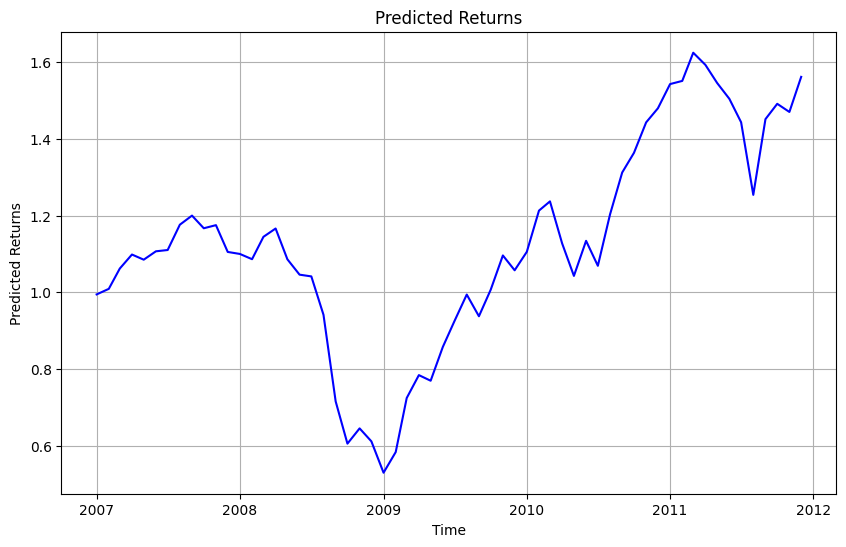

In [316]:
plt.figure(figsize=(10, 6))
plt.plot(cum_return_df["Date"], cum_return_df['cum_return'], "-b", label="loss")
plt.title("Predicted Returns")
plt.xlabel("Time")
plt.ylabel("Predicted Returns")
plt.grid(True)

In [323]:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.title("Actual vs. Predicted Values")
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.grid(True)

# # Add a 45-degree reference line for comparison
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.show()

In [325]:
Date_holder = main_df["yyyymm"].unique()
portfolio_returns = []
Test_df = main_df.reset_index()

for Date in Date_holder:#Date rolling forwards(5 years equals 60 months, which means the cycle is 60)
    Test_data = Test_df[Test_df['yyyymm'] == Date]#Filter the data by date
    Test_data.reset_index(inplace = True, drop = True)
    X_test = Test_data[['Investor_sentiment_3MA', 'News_sentiment_3MA',
          "Consumer_sentiment_3MA", "betaVIX", "BookLeverage", "ConvDebt", "DolVol", "hire",
          "IdioVol3F", "IndMom", "MaxRet", "OPLeverage", "PctAcc", "PctTotAcc", "Price", "RDIPO", 
          "ReturnSkew", "Size", "STreversal", "zerotradeAlt1"]]#Form the input
    y_pred = trained_models[1].predict(X_test)#Get prediction
    #Get the top 20
    y_pred_df = pd.DataFrame(y_pred)
    # Rank the values in descending order and select the top 20
    y_pred_df.columns = ['y_pred']
    Test_data = pd.merge(Test_data, y_pred_df, left_index=True, right_index=True)
    top_20 = pd.DataFrame(Test_data.sort_values(by='y_pred', ascending=False).head(20))
    top_20['weight']=0.05
    top_20['return'] = top_20['weight'] * top_20['forward_return_div100']
    top_20_return = top_20['return'].sum()
    # Append the portfolio return to the list
    portfolio_returns.append(top_20_return)
    cumulative_return = np.cumprod(np.array(portfolio_returns) + 1)

# Display the list of portfolio returns
print(cumulative_return)

3/3 [==============================] - 0s 684us/step
[ 1.04882434  1.07851449  1.08469883  1.07145827  1.12331817  1.07757223
  1.13427359  1.12928739  1.10656769  1.14477505  1.17243976  1.22226744
  1.21632106  1.24921141  1.28551405  1.27100853  1.21081048  1.18412608
  1.19457528  1.1556997   1.17156488  1.25724216  1.23329059  1.2307289
  1.21194654  1.23641925  1.23905699  1.28028459  1.3680591   1.37687563
  1.40414419  1.49680408  1.57488469  1.65071354  1.73067313  1.76918551
  1.80268516  1.81963657  1.82297257  1.88472142  1.91792737  2.00876911
  2.05482824  1.99644081  1.88036375  1.97795268  2.08569557  2.20552526
  2.39271226  2.38358586  2.4470559   2.39435596  2.33004255  2.41449156
  2.68665046  2.78010443  3.08193727  2.98018561  3.0575168   2.92599479
  3.01945066  3.07674138  3.12837073  3.36751043  3.50945037  3.50965052
  3.37034299  3.57771875  3.51306575  3.05245894  3.21175032  3.67277644
  3.89915614  4.15059093  4.52014055  4.31049806  4.50409576  4.50192005

In [326]:
cum_return_df = pd.DataFrame({"cum_return": cumulative_return, "Date": Date_holder})
# cum_return_df.columns = ['cum_return', "Date"]
cum_return_df["Date"] = pd.to_datetime(cum_return_df["Date"], format='%Y%m', errors='coerce')

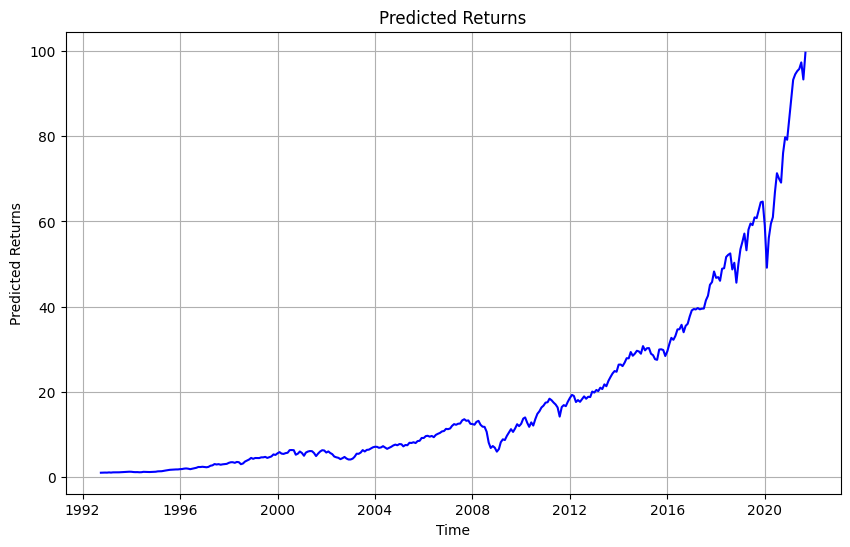

In [327]:
plt.figure(figsize=(10, 6))
plt.plot(cum_return_df["Date"], cum_return_df['cum_return'], "-b", label="loss")
plt.title("Predicted Returns")
plt.xlabel("Time")
plt.ylabel("Predicted Returns")
plt.grid(True)

### Store the model

In [324]:
import os

# Define a directory where you want to save the models
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Iterate through your trained models
for i, model in enumerate(trained_models):
    model_name = f"model_{i + 1}.h5"  # Define a unique name for each model
    model_path = os.path.join(save_dir, model_name)  # Full path to save the model

    # Save the model to the specified path
    model.save(model_path)

    print(f"Model {i + 1} saved to {model_path}")

Model 1 saved to saved_models/model_1.h5
Model 2 saved to saved_models/model_2.h5
Model 3 saved to saved_models/model_3.h5
Model 4 saved to saved_models/model_4.h5
